Data comes from 
[here](https://drive.google.com/file/d/1-g5ifF2Vev47XkGX2QZ-Ix57Ku4aPkXR/view?usp=sharing)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import pickle
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import seaborn as sn

## *Read data from pickle files*

In [ ]:
path_X = '/content/drive/MyDrive/Colab Notebooks/UTEC - IA/data/face_dataset/X.pickle'
path_y = '/content/drive/MyDrive/Colab Notebooks/UTEC - IA/data/face_dataset/y.pickle'
pickle_Xin = open(path_X, "rb")
pickle_yin = open(path_y, "rb")
X = pickle.load(pickle_Xin)
y = pickle.load(pickle_yin)

## *Build training and test data sets with the entire Data*

In [ ]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X[0], y[0], test_size = 0.20)
for i in range(1, len(X)):
  X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X[i], y[i], test_size = 0.20)
  X_train = np.concatenate([X_train, X_train_i])
  y_train = np.concatenate([y_train, y_train_i])
  X_test = np.concatenate([X_test, X_test_i])
  y_test = np.concatenate([y_test, y_test_i])

## *KFold Cross Validation*

### *Linear Model*

In [ ]:
accuracy_linear = []
# evaluation of linear model between different k values
for i in range(2, 20):
  kf = KFold(n_splits = i)
  local_accuracy = 0
  for train_index, test_index in kf.split(X_train):
    # getting training data from training set for evaluate linear model
    X_train_train = X_train[train_index]
    y_train_train = y_train[train_index]
    # getting test data from training set for evaluate linear model
    X_train_test = X_train[test_index]
    y_train_test = y_train[test_index]
    # creating linear model
    svc_model = SVC(kernel='linear')
    # fitting linear model
    svc_model.fit(X_train_train, y_train_train)
    # predicting with test data
    y_pred = svc_model.predict(X_train_test)
    
    # getting accuracy for k values
    cm = confusion_matrix(y_train_test,y_pred)
    local_accuracy_i = sum(np.diag(cm)) / y_train_test.shape[0]
    local_accuracy += local_accuracy_i
  local_accuracy /= i
  print(f'K values: {i}, local accuracy: {local_accuracy}')
  accuracy_linear.append(local_accuracy)
print(f'Average accuracy value for linear model :{sum(accuracy_linear) / len(accuracy_linear)}') 

K values: 2, local accuracy: 0.0676868573516363
K values: 3, local accuracy: 0.3780332056194125
K values: 4, local accuracy: 0.3193354264782836
K values: 5, local accuracy: 0.536109750122489
K values: 6, local accuracy: 0.7072812683499706
K values: 7, local accuracy: 0.6760204081632654
K values: 8, local accuracy: 0.7436224489795917
K values: 9, local accuracy: 0.7266922094508301
K values: 10, local accuracy: 0.8512658227848101
K values: 11, local accuracy: 0.7675878503343292
K values: 12, local accuracy: 0.9158702408702409
K values: 13, local accuracy: 0.8504833963850357
K values: 14, local accuracy: 0.8979591836734693
K values: 15, local accuracy: 0.8601838413159169
K values: 16, local accuracy: 0.8903061224489796
K values: 17, local accuracy: 0.9182129836208304
K values: 18, local accuracy: 0.9380432229269439
K values: 19, local accuracy: 0.918301852191454
Average accuracy value for linear model :0.7201664495037493


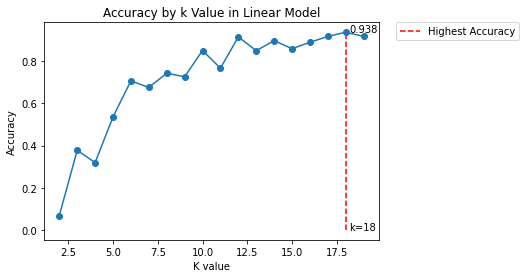

In [ ]:
ind_max_lin = accuracy_linear.index(max(accuracy_linear)) + 2
plt.plot(np.arange(2, 20), accuracy_linear, 'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.vlines(ind_max_lin, 0, max(accuracy_linear), linestyles='dashed', colors='red', label="Highest Accuracy")
plt.text(ind_max_lin + .2, max(accuracy_linear), round(max(accuracy_linear), 3))
plt.text(ind_max_lin + .2, 0, 'k='+str(ind_max_lin))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy by k Value in Linear Model")
plt.show()

### *Polinomial Model*

In [ ]:
accuracy_polynomial = []
# evaluation of polynomial model between different k values
for grade in range(2, 10):
  local_accuracy_grade = 0
  print(f'Polynomial grade: {grade}')
  for i in range(2, 20):
    kf = KFold(n_splits = i)
    local_accuracy = 0
    for train_index, test_index in kf.split(X_train):
      # getting training data from training set for evaluate polynomial model
      X_train_train = X_train[train_index]
      y_train_train = y_train[train_index]
      # getting test data from training set for evaluate polynomial model
      X_train_test = X_train[test_index]
      y_train_test = y_train[test_index]
      # creating polynomial model
      svc_model = SVC(kernel='poly', degree = grade)
      # fitting polynomial model
      svc_model.fit(X_train_train, y_train_train)
      # predicting with test data
      y_pred = svc_model.predict(X_train_test)
      
      # getting accuracy for k values
      cm = confusion_matrix(y_train_test,y_pred)
      local_accuracy_k = sum(np.diag(cm)) / y_train_test.shape[0]
      local_accuracy += local_accuracy_k
    local_accuracy /= i
    print(f'K values: {i}, local accuracy: {local_accuracy}')
    local_accuracy_grade += local_accuracy
  local_accuracy_grade /= 18
  accuracy_polynomial.append(local_accuracy_grade)
print(f'Average accuracy value for Polynomial model :{sum(accuracy_polynomial) / len(accuracy_polynomial)}') 

Polynomial grade: 2
K values: 2, local accuracy: 0.0574599404979383
K values: 3, local accuracy: 0.33205619412515963
K values: 4, local accuracy: 0.2643772893772894
K values: 5, local accuracy: 0.4798709782786216
K values: 6, local accuracy: 0.6293990996281073
K values: 7, local accuracy: 0.6095559845559846
K values: 8, local accuracy: 0.6594124763307384
K values: 9, local accuracy: 0.6628352490421457
K values: 10, local accuracy: 0.7747646867900032
K values: 11, local accuracy: 0.7027493242281974
K values: 12, local accuracy: 0.8203574203574204
K values: 13, local accuracy: 0.772929802437999
K values: 14, local accuracy: 0.8048469387755102
K values: 15, local accuracy: 0.7772859216255442
K values: 16, local accuracy: 0.8137755102040816
K values: 17, local accuracy: 0.8314197094193829
K values: 18, local accuracy: 0.8417312661498708
K values: 19, local accuracy: 0.8407604376795649
Polynomial grade: 3
K values: 2, local accuracy: 0.06128973328461819
K values: 3, local accuracy: 0.332056

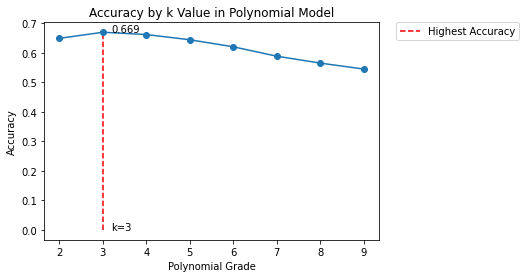

In [ ]:
ind_max_poly = accuracy_polynomial.index(max(accuracy_polynomial)) + 2
plt.plot(np.arange(2, 10), accuracy_polynomial, 'o-')
plt.xlabel("Polynomial Grade")
plt.ylabel("Accuracy")
plt.vlines(ind_max_poly, 0, max(accuracy_polynomial), linestyles='dashed', colors='red', label="Highest Accuracy")
plt.text(ind_max_poly + .2, max(accuracy_polynomial), round(max(accuracy_polynomial), 3))
plt.text(ind_max_poly + .2, 0, 'k='+str(ind_max_poly))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy by k Value in Polynomial Model")
plt.show()

### *RBF Model*

In [ ]:
accuracy_rbf = []
# evaluation of rbf model between different k values
for i in range(2, 20):
  kf = KFold(n_splits = i)
  local_accuracy = 0
  for train_index, test_index in kf.split(X_train):
    # getting training data from training set for evaluate rbf model
    X_train_train = X_train[train_index]
    y_train_train = y_train[train_index]
    # getting test data from training set for evaluate rbf model
    X_train_test = X_train[test_index]
    y_train_test = y_train[test_index]
    # creating rbf model
    svc_model = SVC(kernel='rbf')
    # fitting rbf model
    svc_model.fit(X_train_train, y_train_train)
    # predicting with test data
    y_pred = svc_model.predict(X_train_test)
    
    # getting accuracy for k values
    cm = confusion_matrix(y_train_test,y_pred)
    local_accuracy_i = sum(np.diag(cm)) / y_train_test.shape[0]
    local_accuracy += local_accuracy_i
  local_accuracy /= i
  print(f'K values: {i}, local accuracy: {local_accuracy}')
  accuracy_rbf.append(local_accuracy)
print(f'Average accuracy value for rbf model :{sum(accuracy_rbf) / len(accuracy_rbf)}') 

K values: 2, local accuracy: 0.01660773004854116
K values: 3, local accuracy: 0.27969348659003834
K values: 4, local accuracy: 0.11989795918367346
K values: 5, local accuracy: 0.39182590233545644
K values: 6, local accuracy: 0.45349383440986496
K values: 7, local accuracy: 0.5253378378378378
K values: 8, local accuracy: 0.5305464969492951
K values: 9, local accuracy: 0.5913154533844189
K values: 10, local accuracy: 0.6065076273937035
K values: 11, local accuracy: 0.5987871674491392
K values: 12, local accuracy: 0.6421134421134421
K values: 13, local accuracy: 0.6497898276586801
K values: 14, local accuracy: 0.6530380333951763
K values: 15, local accuracy: 0.641170778906628
K values: 16, local accuracy: 0.6759938350340136
K values: 17, local accuracy: 0.6912172824726559
K values: 18, local accuracy: 0.7099189570119803
K values: 19, local accuracy: 0.708631334433645
Average accuracy value for rbf model :0.5269937214782329


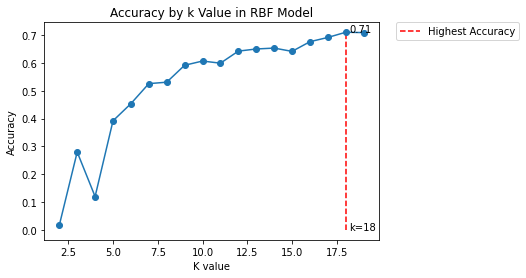

In [ ]:
ind_max_rbf = accuracy_rbf.index(max(accuracy_rbf)) + 2
plt.plot(np.arange(2, 20, 1), accuracy_rbf, 'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.vlines(ind_max_rbf, 0, max(accuracy_rbf), linestyles='dashed', colors='red', label="Highest Accuracy")
plt.text(ind_max_rbf + .2, max(accuracy_rbf), round(max(accuracy_rbf), 3))
plt.text(ind_max_rbf + .2, 0, 'k='+str(ind_max_rbf))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy by k Value in RBF Model")
plt.show()

### *Sigmoid Model*

In [ ]:
accuracy_sigmoid = []
# evaluation of sigmoid model between different k values
for i in range(2, 20):
  kf = KFold(n_splits = i)
  local_accuracy = 0
  for train_index, test_index in kf.split(X_train):
    # getting training data from training set for evaluate sigmoid model
    X_train_train = X_train[train_index]
    y_train_train = y_train[train_index]
    # getting test data from training set for evaluate sigmoid model
    X_train_test = X_train[test_index]
    y_train_test = y_train[test_index]
    # creating sigmoid model
    svc_model = SVC(kernel='sigmoid')
    # fitting sigmoid model
    svc_model.fit(X_train_train, y_train_train)
    # predicting with test data
    y_pred = svc_model.predict(X_train_test)
    
    # getting accuracy for k values
    cm = confusion_matrix(y_train_test,y_pred)
    local_accuracy_i = sum(np.diag(cm)) / y_train_test.shape[0]
    local_accuracy += local_accuracy_i
  local_accuracy /= i
  print(f'K values: {i}, local accuracy: {local_accuracy}')
  accuracy_sigmoid.append(local_accuracy)
#accuracy_sigmoid = np.array(accuracy_sigmoid)
print(f'Average accuracy value for sigmoid model :{sum(accuracy_sigmoid) / len(accuracy_sigmoid)}') 

K values: 2, local accuracy: 0.0012755102040816326
K values: 3, local accuracy: 0.006385696040868454
K values: 4, local accuracy: 0.00510204081632653
K values: 5, local accuracy: 0.007692307692307693
K values: 6, local accuracy: 0.012810726169504795
K values: 7, local accuracy: 0.007653061224489796
K values: 8, local accuracy: 0.02423469387755102
K values: 9, local accuracy: 0.03831417624521073
K values: 10, local accuracy: 0.04094449853943525
K values: 11, local accuracy: 0.07538412291933418
K values: 12, local accuracy: 0.032031857031857035
K values: 13, local accuracy: 0.10769230769230768
K values: 14, local accuracy: 0.13824211502782932
K values: 15, local accuracy: 0.08333333333333334
K values: 16, local accuracy: 0.11870216836734693
K values: 17, local accuracy: 0.04859335038363171
K values: 18, local accuracy: 0.056730091613812546
K values: 19, local accuracy: 0.035943517329910135
Average accuracy value for sigmoid model :0.04672586525050772


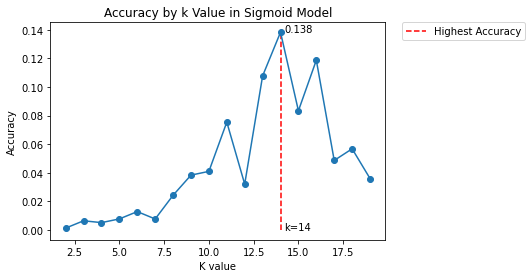

In [ ]:
ind_max_sig = accuracy_sigmoid.index(max(accuracy_sigmoid)) + 2
plt.plot(np.arange(2, 20, 1), accuracy_sigmoid, 'o-')
plt.xlabel("K value")
plt.vlines(ind_max_sig, 0, max(accuracy_sigmoid), linestyles='dashed', colors='red', label="Highest Accuracy")
plt.text(ind_max_sig + .2, max(accuracy_sigmoid), round(max(accuracy_sigmoid), 3))
plt.text(ind_max_sig + .2, 0, 'k='+str(ind_max_sig))
plt.ylabel("Accuracy")
plt.title("Accuracy by k Value in Sigmoid Model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

## *Bootstrap Validation*

### *Linear Model*

In [ ]:
np.random.seed(100)
accuracy_lm_bootstrap = []
t = 10
n_samples_train = int(X_train.shape[0] * 0.8)
for i in range(t):
  index = np.arange(0, X_train.shape[0])
  train_index = resample(index, n_samples=n_samples_train, replace=True, random_state=i)
  test_index = np.array(list(set(index) - set(np.unique(train_index))))
  X_train_train = X_train[train_index]
  y_train_train = y_train[train_index]
  # getting test data from training set for evaluate linear model
  X_train_test = X_train[test_index]
  y_train_test = y_train[test_index]
  # creating linear model
  svc_model = SVC(kernel='linear')
  # fitting linear model
  svc_model.fit(X_train_train, y_train_train)
  # predicting with test data
  y_pred = svc_model.predict(X_train_test)
    
  # getting accuracy for k values
  cm = confusion_matrix(y_train_test,y_pred)
  local_accuracy_i = sum(np.diag(cm)) / y_train_test.shape[0]
  accuracy_lm_bootstrap.append(local_accuracy_i) 
  print(f'Random state:: {i}, local accuracy: {local_accuracy_i}')
print(f'Average accuracy value for linear model :{sum(accuracy_lm_bootstrap) / len(accuracy_lm_bootstrap)}') 

Random state:: 0, local accuracy: 0.9224137931034483
Random state:: 1, local accuracy: 0.9017341040462428
Random state:: 2, local accuracy: 0.8833819241982507
Random state:: 3, local accuracy: 0.8904494382022472
Random state:: 4, local accuracy: 0.9186046511627907
Random state:: 5, local accuracy: 0.9620991253644315
Random state:: 6, local accuracy: 0.9346590909090909
Random state:: 7, local accuracy: 0.9248554913294798
Random state:: 8, local accuracy: 0.9568965517241379
Random state:: 9, local accuracy: 0.8966480446927374
Average accuracy value for linear model :0.9191742214732856


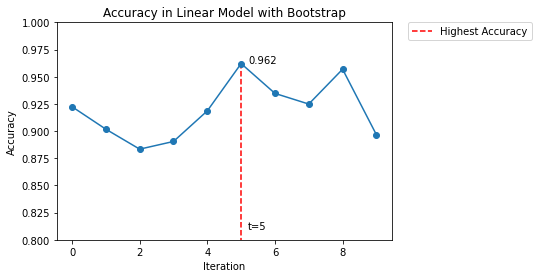

In [ ]:
ind_max_lin_boot = accuracy_lm_bootstrap.index(max(accuracy_lm_bootstrap))
plt.plot(np.arange(0, 10), accuracy_lm_bootstrap, 'o-')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.vlines(ind_max_lin_boot, 0, max(accuracy_lm_bootstrap), linestyles='dashed', colors='red', label="Highest Accuracy")
plt.text(ind_max_lin_boot + .2, max(accuracy_lm_bootstrap), round(max(accuracy_lm_bootstrap), 3))
plt.text(ind_max_lin_boot + .2, 0.81, 't='+str(ind_max_lin_boot))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy in Linear Model with Bootstrap")
plt.ylim(.8,1)
plt.show()

### *RBF Model*

In [ ]:
np.random.seed(100)
accuracy_rbf_bootstrap = []
t = 10
n_samples_train = int(X_train.shape[0] * 0.8)
for i in range(t):
  index = np.arange(0, X_train.shape[0])
  train_index = resample(index, n_samples=n_samples_train, replace=True, random_state=i)
  test_index = np.array(list(set(index) - set(np.unique(train_index))))
  X_train_train = X_train[train_index]
  y_train_train = y_train[train_index]
  # getting test data from training set for evaluate rbf model
  X_train_test = X_train[test_index]
  y_train_test = y_train[test_index]
  # creating rbf model
  svc_model = SVC(kernel='rbf')
  # fitting rbf model
  svc_model.fit(X_train_train, y_train_train)
  # predicting with test data
  y_pred = svc_model.predict(X_train_test)
    
  # getting accuracy for k values
  cm = confusion_matrix(y_train_test,y_pred)
  local_accuracy_i = sum(np.diag(cm)) / y_train_test.shape[0]
  accuracy_rbf_bootstrap.append(local_accuracy_i) 
  print(f'Random state:: {i}, local accuracy: {local_accuracy_i}')
print(f'Average accuracy value for rbf model :{sum(accuracy_rbf_bootstrap) / len(accuracy_rbf_bootstrap)}') 

Random state:: 0, local accuracy: 0.7729885057471264
Random state:: 1, local accuracy: 0.8005780346820809
Random state:: 2, local accuracy: 0.8134110787172012
Random state:: 3, local accuracy: 0.7780898876404494
Random state:: 4, local accuracy: 0.8081395348837209
Random state:: 5, local accuracy: 0.8017492711370262
Random state:: 6, local accuracy: 0.7897727272727273
Random state:: 7, local accuracy: 0.8063583815028902
Random state:: 8, local accuracy: 0.8419540229885057
Random state:: 9, local accuracy: 0.7653631284916201
Average accuracy value for rbf model :0.7978404573063348


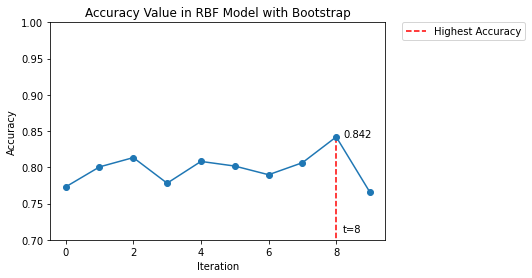

In [ ]:
ind_max_rbf_boot = accuracy_rbf_bootstrap.index(max(accuracy_rbf_bootstrap))
plt.plot(np.arange(0, 10), accuracy_rbf_bootstrap, 'o-')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.vlines(ind_max_rbf_boot, 0, max(accuracy_rbf_bootstrap), linestyles='dashed', colors='red', label="Highest Accuracy")
plt.text(ind_max_rbf_boot + .2, max(accuracy_rbf_bootstrap), round(max(accuracy_rbf_bootstrap), 3))
plt.text(ind_max_rbf_boot + .2, 0.71, 't='+str(ind_max_rbf_boot))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy Value in RBF Model with Bootstrap")
plt.ylim(.7,1)
plt.show()

## *Model SVM*

### *Create and Fitting the model*

In [ ]:
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### *Predict with test data*

In [ ]:
y_pred = svc_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print(f'Accuracy: {np.round(sum(np.diag(cm)/y_pred.shape[0]), 3)}')
print(cm)
print(cr)

Accuracy: 0.99
[[27  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0]
 [ 2  0 34  0  0  0  0]
 [ 0  0  0 17  0  0  0]
 [ 0  0  0  0 15  0  0]
 [ 0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0 50]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        27
         1.0       1.00      1.00      1.00        11
         2.0       1.00      0.94      0.97        36
         3.0       1.00      1.00      1.00        17
         4.0       1.00      1.00      1.00        15
         5.0       1.00      1.00      1.00        42
         6.0       1.00      1.00      1.00        50

    accuracy                           0.99       198
   macro avg       0.99      0.99      0.99       198
weighted avg       0.99      0.99      0.99       198



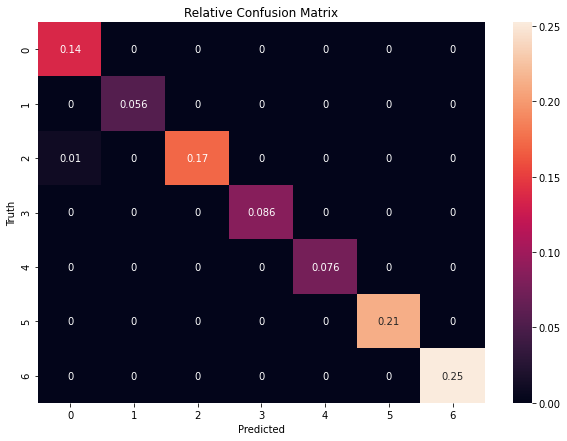

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(cm / y_test.shape[0], annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Relative Confusion Matrix")
plt.show()

## PCA

In [ ]:
from sklearn.decomposition import PCA
features_n = [50, 100, 200, 300, 400]
explained_p = []
accuracy_pca = []
for size_n in features_n:
  p = PCA(n_components=size_n, whiten=True).fit(X_train)
  X = p.transform(X_train)
  print(f'Explained value: {sum(p.explained_variance_ratio_)}')
  explained_p.append(sum(p.explained_variance_ratio_))
  svc_model = SVC(kernel='linear')
  svc_model.fit(X, y_train)
  x_p = p.transform(X_test)
  y_pred = svc_model.predict(x_p)
  cm = confusion_matrix(y_test,y_pred)
  print(f'Size:{size_n}, Accuracy:{sum(np.diag(cm))/y_test.shape[0]}')
  accuracy_pca.append(sum(np.diag(cm))/y_test.shape[0])

Explained value: 0.9396461480640859
Size:50, Accuracy:0.9848484848484849
Explained value: 0.9780733354958626
Size:100, Accuracy:0.9848484848484849
Explained value: 0.9958540602301503
Size:200, Accuracy:0.98989898989899
Explained value: 0.9992406597626818
Size:300, Accuracy:0.98989898989899
Explained value: 0.9998720499438818
Size:400, Accuracy:0.98989898989899


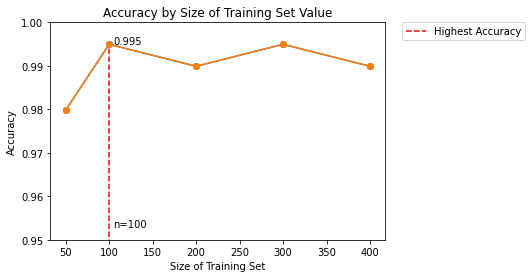

In [ ]:
plt.plot(features_n, accuracy_pca, 'o-')
ind_max_ac_pca = features_n[accuracy_pca.index(max(accuracy_pca))]
plt.plot(features_n, accuracy_pca, 'o-')
plt.xlabel("Size of Training Set")
plt.ylabel("Accuracy")
plt.vlines(ind_max_ac_pca, 0, max(accuracy_pca), linestyles='dashed', colors='red', label="Highest Accuracy")
plt.text(ind_max_ac_pca + 5, max(accuracy_pca), round(max(accuracy_pca), 3))
plt.text(ind_max_ac_pca + 5, 0.953, 'n='+str(ind_max_ac_pca))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Accuracy by Size of Training Set Value")
plt.ylim(.95,1)
plt.show()

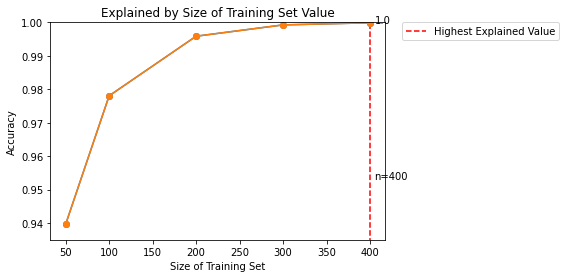

In [ ]:
plt.plot(features_n, explained_p, 'o-')
ind_max_ex_pca = features_n[explained_p.index(max(explained_p))]
plt.plot(features_n, explained_p, 'o-')
plt.xlabel("Size of Training Set")
plt.ylabel("Accuracy")
plt.vlines(ind_max_ex_pca, 0, max(explained_p), linestyles='dashed', colors='red', label="Highest Explained Value")
plt.text(ind_max_ex_pca + 5, max(explained_p), round(max(explained_p), 3))
plt.text(ind_max_ex_pca + 5, 0.953, 'n='+str(ind_max_ex_pca))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Explained by Size of Training Set Value")
plt.ylim(.935,1)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
np.random.seed(100)
p = PCA(n_components=100, whiten=True).fit(X_train)
X = p.transform(X_train)

In [ ]:
sum(p.explained_variance_ratio_)

0.9780507857730601

In [ ]:
svc_model = SVC(kernel='linear')
svc_model.fit(X, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
xtest_100 = p.transform(X_test)
y_pred_100 = svc_model.predict(xtest_100)

In [ ]:
cm_100 = confusion_matrix(y_test,y_pred_100)
cr_100 = classification_report(y_test,y_pred_100)
print(cm_100)
print(cr_100)

[[27  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0]
 [ 0  0 36  0  0  0  0]
 [ 0  0  0 17  0  0  0]
 [ 0  0  0  0 15  0  0]
 [ 0  0  0  0  0 41  1]
 [ 0  0  0  0  0  0 50]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        36
         3.0       1.00      1.00      1.00        17
         4.0       1.00      1.00      1.00        15
         5.0       1.00      0.98      0.99        42
         6.0       0.98      1.00      0.99        50

    accuracy                           0.99       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      0.99      0.99       198



In [ ]:
np.round(sum(np.diag(cm_100))/y_test.shape[0], 3)

0.995

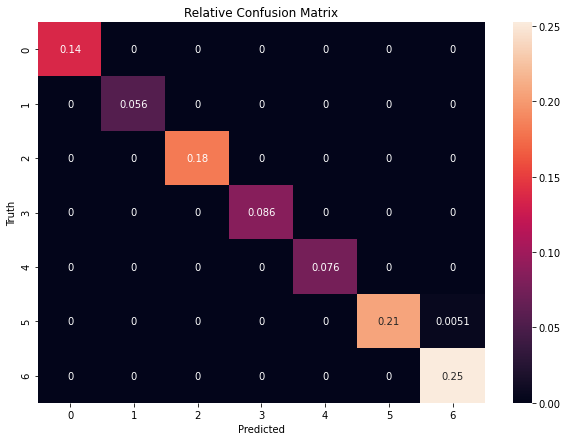

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_100 / y_test.shape[0], annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth') 
plt.title("Relative Confusion Matrix")
plt.show()